In [3]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
(train_images,train_labels),(test_images,test_labels)  = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


### Scaling

In [0]:
train_images, test_images = train_images/255 , test_images/255

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

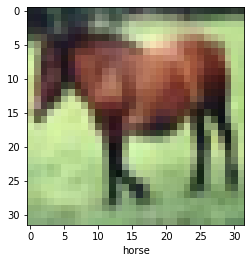

In [8]:
IMG_INDEX = 7
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN Architecture

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Adding Dense Layers

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [12]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Training the model

In [0]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [14]:
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.5029 - acc: 0.4540 - val_loss: 1.1916 - val_acc: 0.5735
Epoch 2/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.1218 - acc: 0.6031 - val_loss: 1.0496 - val_acc: 0.6245
Epoch 3/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.9777 - acc: 0.6602 - val_loss: 0.9620 - val_acc: 0.6617
Epoch 4/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8779 - acc: 0.6924 - val_loss: 0.9140 - val_acc: 0.6761
Epoch 5/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8061 - acc: 0.7175 - val_loss: 0.8772 - val_acc: 0.6921
Epoch 6/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.7470 - acc: 0.7372 - val_loss: 0.8772 - val_acc: 0.6986
Epoch 7/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.6992 - acc: 0.7544 - val_loss: 0.

### Evaluation

In [15]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print(test_loss, test_acc )

10000/10000 - 4s - loss: 0.8723 - acc: 0.7148
0.872318750667572 0.7148


## Working with small datasets

### Data Augmentation

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

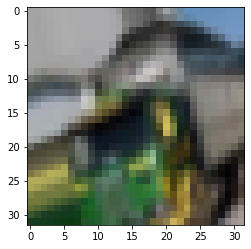

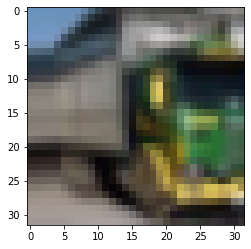

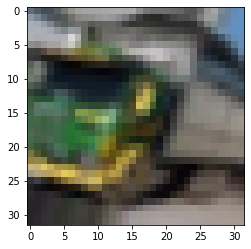

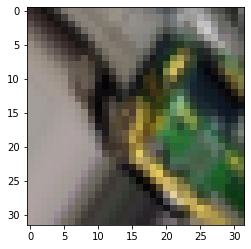

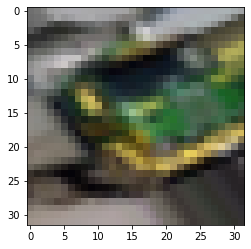

In [21]:
##Pick Image to transform
n = 14
test_img = train_images[n]
img = image.img_to_array(test_img) # Image to numpy array
img = img.reshape((1,)+img.shape) #reshape image

i  = 0
for batch in datagen.flow(img, save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()

### Pretrained Models

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True
)

In [47]:
get_label_name = metadata.features['label'].int2str
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

RuntimeError: ignored

In [0]:
IMG_SIZE = 160

def format_example(image, label):
  image = tf.cast(image,tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image,(IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [51]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

RuntimeError: ignored

In [0]:
# Picking Pretained Model
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

base_model = tf.keras.applications.MobileNetV2(
    input_shape = IMG_SHAPE,
    include_top = False,
    weights='imagenet'
)

In [53]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [54]:
for image, _ in train_batches.take(1):
  pass
feature_batch = base_model(image)
print(feature_batch.shape)

RuntimeError: ignored

In [0]:
# Freeze the model
base_model.trainable = False

In [56]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
# ADDING OUR OWN Classifier

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [0]:
prediction_layer = keras.layers.Dense(1)

In [0]:
model = tf.keras.Sequential(
    [
     base_model,
     global_average_layer,
     prediction_layer
    ]
)

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
base_learning_rate = 3
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [62]:
initial_epochs = 3
validation_steps =20

loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

20/20 [==============================] - 26s 1s/step - loss: 0.8240 - acc: 0.4516


In [65]:
history = model.fit(train_batches, epochs=initial_epochs, validation_data=validation_batches, steps_per_epoch = 100)

Train on 100 steps
Epoch 1/3
 99/100 [============================>.] - ETA: 1s - loss: 56.2242 - acc: 0.9369

ValueError: ignored

In [66]:
acc = history.history['accuracy']
print(acc)

KeyError: ignored